In [4]:
#import libraries and dependencies

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# downloading stock data

stock = 'ko'

# Call dataset
data = yf.download(stock, '2018-01-01', '2022-04-14').drop(columns='Adj Close')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,45.910000,45.939999,45.509998,45.540001,10872200
2018-01-03,45.490002,45.689999,45.340000,45.439999,12635600
2018-01-04,45.560001,46.220001,45.450001,46.080002,12709400
2018-01-05,46.020000,46.200001,45.790001,46.070000,13113100
2018-01-08,45.950001,46.099998,45.880001,46.000000,7068600
...,...,...,...,...,...
2022-04-07,63.130001,63.669998,62.709999,63.439999,13960800
2022-04-08,63.480000,64.040001,63.160000,63.830002,12702700
2022-04-11,63.910000,64.300003,63.639999,63.810001,12720100


In [6]:
# RSI Strategy parameter and thresholds
rsi_days = 14
rsi_oversold = 30
rsi_overbought = 70
fee = 0.005


In [7]:
# TA signals
data['returns'] = data['Close'].pct_change()
# Upward movement
data['Up'] = np.maximum(data['Close'].diff(),0)
data['Down'] = np.maximum(-data['Close'].diff(),0)
data['RS'] = data['Up'].rolling(rsi_days).mean()/data['Down'].rolling(rsi_days).mean()
data['RSI'] = 100 - 100/(1 + data['RS'])
                       

In [8]:
# simulate strategy
start = rsi_days
data['signal'] = 1*(data['RSI'] < rsi_oversold) - 1*(data['RSI'] > rsi_overbought)


In [9]:
# Buy and Hold strategy
BnH_returns = np.array(data['returns'][start+1:])
BnH = np.prod(1+BnH_returns)**(252/len(BnH_returns)) -1
BnH_risk = np.std(BnH_returns)*(252)**(1/2)

In [10]:
# RSI strategy
RSI_return = np.array(data['returns'][start+1:])*np.array(data['signal'][start:-1])
RSI = np.prod(1+RSI_return)**(252/len(RSI_return)) -1
RSI_risk = np.std(RSI_return)*(252)**(1/2)

In [11]:
#visualizing the results
print('buy/hold strategy return and risk: '+str(round(BnH*100,2))+'% and '+str(round(BnH_risk*100,2))+'%')
print('RSI strategy return and risk: '+str(round(RSI*100,2))+'% and '+str(round(RSI_risk*100,2))+'%')

buy/hold strategy return and risk: 7.63% and 21.98%
RSI strategy return and risk: 14.49% and 10.57%


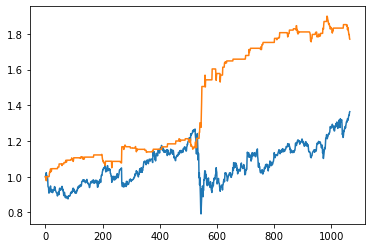

In [12]:
# Plot
plt.plot(np.append(1,np.cumprod(1+BnH_returns)))
plt.plot(np.append(1,np.cumprod(1+RSI_return)))